In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data/judge-1377884607_tweet_product_company.csv', encoding='latin1')

In [3]:
df1 = df.drop('emotion_in_tweet_is_directed_at', axis=1)

In [4]:
df1.rename(columns={'is_there_an_emotion_directed_at_a_brand_or_product':'target'}, 
          inplace=True)
df1.head()

,tweet_text,target
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion


In [6]:
import numpy as np
np.random.seed(0)
import nltk
from nltk import FreqDist, word_tokenize
from nltk.corpus import stopwords
from nltk.collocations import *
import string
import re
from nltk.stem import WordNetLemmatizer 
# nltk.download('punkt')
# nltk.download('stopwords')

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.util import ngrams
import seaborn as sns

In [8]:
stop_words = stopwords.words("english")
lemmatizer = WordNetLemmatizer()

def preprocess(text, lemma=False):
    text = str(text).lower().strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if lemma:
                tokens.append(lemmatizer.lemmatize(token))
            else:
                tokens.append(token)
    return " ".join(tokens)
df1['tweet_text']=df1['tweet_text'].apply(lambda x:preprocess(x))

In [17]:
df1['tweet_text'] = df1.tweet_text.astype(str)

In [9]:
def get_tweet_bigram(corpus,n):
    vec=CountVectorizer(ngram_range=(2,2))
    bow=vec.fit_transform(corpus)
    sum_word=bow.sum(axis=0)
    word_freq=[(x,sum_word[0,i]) for x,i in vec.vocabulary_.items()]
    word_freq=sorted(word_freq,key=lambda x:x[1],reverse=True)
    return word_freq[:n]

C:\Users\quayq\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

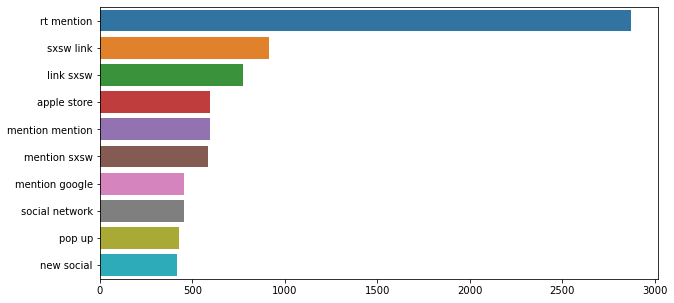

In [15]:
plt.figure(figsize=(10,5))
top_tweet_bigram=get_tweet_bigram(df1['tweet_text'],10)
x,y=map(list,zip(*top_tweet_bigram))
sns.barplot(y,x)

In [19]:
joined_tweet = ' '.join(df1['tweet_text'].tolist())
joined_tweet

".@wesley83 3g iphone. 3 hrs tweeting #rise_austin, dead! need upgrade. plugin stations #sxsw. @jessedee know @fludapp ? awesome ipad/iphone app likely appreciate design. also, they're giving free ts #sxsw @swonderlin wait #ipad 2 also. sale #sxsw. @sxsw hope year's festival crashy year's iphone app. #sxsw @sxtxstate great stuff fri #sxsw: marissa mayer (google), tim o'reilly (tech books/conferences) &amp; matt mullenweg (wordpress) @teachntech00 new ipad apps #speechtherapy communication showcased #sxsw conference http://ht.ly/49n4m #iear #edchat #asd nan #sxsw starting, #ctia around corner #googleio hop skip jump there, good time #android fan beautifully smart simple idea rt @madebymany @thenextweb wrote #hollergram ipad app #sxsw! http://bit.ly/ieavob counting days #sxsw plus strong canadian dollar means stock apple gear excited meet @samsungmobileus #sxsw show sprint galaxy still running android 2.1. #fail find &amp; start impromptu parties #sxsw @hurricaneparty http://bit.ly/gvlri

In [29]:
def remove_urls(corpus):
    pattern = re.compile(r'https?:\/\/\S*')
    return pattern.sub(r'', corpus)

df1['tweet_text'] = df1['tweet_text'].apply(lambda x:remove_urls(x))

In [30]:
df1['tweet_text'] = df1['tweet_text'].str.replace(r"({link})", '')

In [31]:
def remove_hashtags(corpus):
    pattern = re.compile(r"\s?([@#][\w_-]+)")
    return pattern.sub(r'', corpus)

df1['tweet_text'] = df1['tweet_text'].apply(lambda x:remove_hashtags(x))

In [32]:
def remove_punct(corpus):
    pattern = re.compile(r"[,\'?\.!$%_-]")
    return pattern.sub(r'', corpus)

df1['tweet_text'] = df1['tweet_text'].apply(lambda x:remove_punct(x))

C:\Users\quayq\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

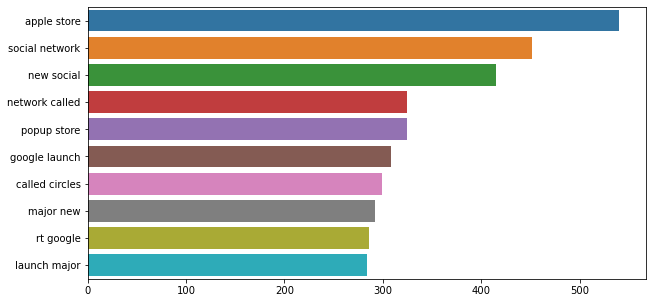

In [33]:
plt.figure(figsize=(10,5))
top_tweet_bigram=get_tweet_bigram(df1['tweet_text'],10)
x,y=map(list,zip(*top_tweet_bigram))
sns.barplot(y,x)

In [34]:
df1['tweet_text']

0        3g iphone 3 hrs tweeting dead need upgrade pl...
1        know  awesome ipad/iphone app likely apprecia...
2                                        wait 2 also sale
3             hope years festival crashy years iphone app
4        great stuff fri: marissa mayer (google) tim o...
                              ...                        
9088                                     ipad everywhere 
9089    wave buzz rt interrupt regularly scheduled gee...
9090    googles zeiger physician never reported potent...
9091    verizon iphone customers complained time fell ...
9092    ï¡ïàüêîò£áââ£âûârt goog...
Name: tweet_text, Length: 9093, dtype: object